### imports

In [5]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from easyesn import PredictionESN



Using Numpy backend.


ModuleNotFoundError: No module named 'scipy.sparse.linalg.eigen.arpack'; 'scipy.sparse.linalg.eigen' is not a package

### data setup

In [4]:
area = "city of london"
monthly_data = utils.load_interpolated_data()

def to_date(seconds):
    start_time = monthly_data["date"][0]
    return np.array(
        [start_time + timedelta(seconds=num) for num in seconds])

area_data = utils.get_area(monthly_data, area)

X = np.array(area_data["seconds"]).reshape(
    -1, 1)  # can also add other features like crimes, salary, population, etc
y = np.array(area_data["average_price"])

In [7]:
area_data

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year,month,average_price_d1,seconds,median_salary,life_satisfaction,population_size,number_of_jobs,area_size,no_of_houses
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1,1995,1,0.0,0.0,33020.00000,7.465628,6581.0000,381160.0,1524.081081,69719.48649
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1,1995,2,-9246.0,2678400.0,33020.00000,7.465628,6581.0000,381160.0,1524.081081,69719.48649
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1,1995,3,-3082.0,5097600.0,33020.00000,7.465628,6581.0000,381160.0,1524.081081,69719.48649
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1,1995,4,-2020.0,7776000.0,33020.00000,7.465628,6581.0000,381160.0,1524.081081,69719.48649
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1,1995,5,7308.0,10368000.0,33020.00000,7.465628,6581.0000,381160.0,1524.081081,69719.48649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2019-09-01,city of london,792034,E09000001,11.0,NaN,1,2019,9,14421.0,778377600.0,61527.75000,7.203618,232570.6154,467200.0,2342.432432,39252.10811
297,2019-10-01,city of london,827093,E09000001,4.0,NaN,1,2019,10,35059.0,780969600.0,61563.83333,7.202513,257444.4615,448000.0,2567.702703,42896.67568
298,2019-11-01,city of london,777610,E09000001,5.0,NaN,1,2019,11,-49483.0,783648000.0,61599.91667,7.201407,282318.3077,428800.0,2792.972973,46541.24324
299,2019-12-01,city of london,734872,E09000001,NaN,NaN,1,2019,12,-42738.0,786240000.0,61636.00000,7.200302,307192.1538,409600.0,3018.243243,50185.81081


In [5]:
X

array([[0.000000e+00],
       [2.678400e+06],
       [5.097600e+06],
       [7.776000e+06],
       [1.036800e+07],
       [1.304640e+07],
       [1.563840e+07],
       [1.831680e+07],
       [2.099520e+07],
       [2.358720e+07],
       [2.626560e+07],
       [2.885760e+07],
       [3.153600e+07],
       [3.421440e+07],
       [3.672000e+07],
       [3.939840e+07],
       [4.199040e+07],
       [4.466880e+07],
       [4.726080e+07],
       [4.993920e+07],
       [5.261760e+07],
       [5.520960e+07],
       [5.788800e+07],
       [6.048000e+07],
       [6.315840e+07],
       [6.583680e+07],
       [6.825600e+07],
       [7.093440e+07],
       [7.352640e+07],
       [7.620480e+07],
       [7.879680e+07],
       [8.147520e+07],
       [8.415360e+07],
       [8.674560e+07],
       [8.942400e+07],
       [9.201600e+07],
       [9.469440e+07],
       [9.737280e+07],
       [9.979200e+07],
       [1.024704e+08],
       [1.050624e+08],
       [1.077408e+08],
       [1.103328e+08],
       [1.1

In [6]:
y

array([ 91449,  82203,  79121,  77101,  84409,  94901, 110128, 112329,
       104473, 108038, 117636, 127232, 108999,  93357,  93707, 120543,
       112050, 114226,  97547, 114179, 108138,  98934,  99707, 106427,
       116343, 111142, 107488, 108480, 115453, 118317, 117034, 113585,
       115159, 121251, 131074, 130035, 124382, 143829, 156508, 163403,
       143625, 132251, 140377, 148993, 152807, 162020, 152387, 155801,
       149143, 164545, 174586, 191157, 191081, 185993, 164056, 160905,
       166193, 163490, 175143, 169309, 173738, 174152, 178339, 183101,
       175041, 198191, 214852, 221952, 223175, 245062, 321773, 314772,
       284262, 198137, 189033, 205494, 223459, 242435, 230700, 231632,
       229806, 263887, 346458, 362204, 344239, 284015, 253697, 245313,
       227281, 253130, 262428, 274016, 277047, 271941, 280283, 262197,
       261645, 263992, 291969, 295174, 284860, 267208, 260204, 245449,
       243184, 252980, 277515, 305556, 326913, 301092, 272731, 269514,
      

In [8]:
# split train/test data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    shuffle=False)

In [9]:
X_train

array([[0.000000e+00],
       [2.678400e+06],
       [5.097600e+06],
       [7.776000e+06],
       [1.036800e+07],
       [1.304640e+07],
       [1.563840e+07],
       [1.831680e+07],
       [2.099520e+07],
       [2.358720e+07],
       [2.626560e+07],
       [2.885760e+07],
       [3.153600e+07],
       [3.421440e+07],
       [3.672000e+07],
       [3.939840e+07],
       [4.199040e+07],
       [4.466880e+07],
       [4.726080e+07],
       [4.993920e+07],
       [5.261760e+07],
       [5.520960e+07],
       [5.788800e+07],
       [6.048000e+07],
       [6.315840e+07],
       [6.583680e+07],
       [6.825600e+07],
       [7.093440e+07],
       [7.352640e+07],
       [7.620480e+07],
       [7.879680e+07],
       [8.147520e+07],
       [8.415360e+07],
       [8.674560e+07],
       [8.942400e+07],
       [9.201600e+07],
       [9.469440e+07],
       [9.737280e+07],
       [9.979200e+07],
       [1.024704e+08],
       [1.050624e+08],
       [1.077408e+08],
       [1.103328e+08],
       [1.1

### create and train model

In [24]:
# create model
degree =5
polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()
# is std scaler actually supposed to be after polynomial features? 
polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)

polynomial_regression.fit(X_train, y_train)
# y_pred = polynomial_regression.predict(X_test)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

### predictions/evaluation

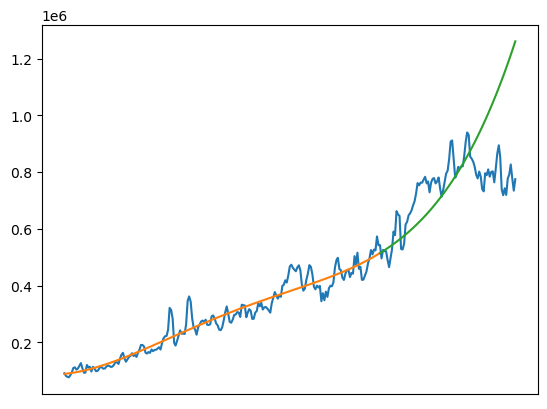

In [25]:
plt.plot(X, y)
plt.gca().set_xticks([])
plt.plot(X_train.reshape(-1), polynomial_regression.predict(X_train))
plt.plot(X_test.reshape(-1), polynomial_regression.predict(X_test))
plt.show()